# Readme

This is a notebook for generating histograms of a and b values in RP

## Imports

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

import seaborn as sns
from IPython.core.pylabtools import figsize

## Data preparation

Get df and add `groupId` column to it.

We have such rpId: <br/>
<br/>
`L-TOP` 24    20    4    0     -    100    104    120    124 `R-TOP`<br/>
`L-HOR` 23    22    3    2     -    102    103    122    123 `R-HOR`<br/>
`L-BOT` 25    21    5    1     -    101    105    121    125 `R-BOT`<br/>

In [2]:
# lines_df = pd.read_csv('data/2015_10_17_fill4510-1k.csv')
lines_df = pd.read_csv('data/2015_10_17_fill4510.csv')

In [3]:
def get_arm_id(rpId):
    if int(rpId/100) == 0:
        return "L"
    return "R"

def get_group_id(rpId):
    group_id = get_arm_id(rpId) + "-"
    
    if rpId % 10 == 0 or rpId % 10 == 4:
        group_id += "TOP"
    elif rpId % 10 == 3 or rpId % 10 == 2:
        group_id += "HOR"
    else:
        group_id += "BOT"
    
    return group_id

In [4]:
# LAMBDA TO APPLY ON A ROW
def label_group_id(row):
    rpId = row['rpId']
    return get_group_id(rpId)

# CREATE NEW COLUMN
lines_df['groupId'] = lines_df.apply (lambda row: label_group_id(row), axis=1)

# REARRANGE COLUMNS
cols = lines_df.columns.tolist()
cols = cols[0:2] + cols[-1:] + cols[2:-1]
lines_df = lines_df[cols]

In [5]:
# COUNT OCCURANCES
group_count = lines_df.groupby('groupId').size()
group_count

groupId
L-BOT    531670
L-HOR     10148
L-TOP    533882
R-BOT    528616
R-HOR      9276
R-TOP    487690
dtype: int64

**This is our great df** <br>With [u|v] lines from single_tracknig. From reco_0.root.

In [32]:
lines_df

,recoId,eventId,groupId,rpId,direction,a,b
0,0,2,L-BOT,5,u,-0.000483,4.91923
1,0,2,L-BOT,5,v,0.000367,6.81209
2,0,2,L-BOT,21,u,-0.000415,6.01698
3,0,2,L-BOT,21,v,-0.001353,6.25026
4,0,2,L-BOT,25,u,-0.000648,6.71191
5,0,2,L-BOT,25,v,-0.000656,6.85437
6,0,2,R-TOP,104,u,-0.000472,7.03884
7,0,2,R-TOP,104,v,-0.002003,5.46762
8,0,2,R-TOP,120,u,-0.000328,6.57265
9,0,2,R-TOP,120,v,-0.000193,6.47599


**Helpers data**

In [15]:
U_DIRECTION = 'u'
V_DIRECTION = 'v'

A_LABEL = 'a'
B_LABEL = 'b'

In [7]:
rp_ids = [0,1,2,3,4,5,20,21,22,23,24,25,100,101,102,103,104,105,120,121,122,123,124,125]
rp_groups_dict = {
    "L-BOT" : [25, 21, 5, 1],
    "L-HOR" : [23, 22, 3, 2],
    "L-TOP" : [24, 20, 4, 0],
    "R-BOT" : [101, 105, 121, 125],
    "R-HOR" : [102, 103, 122, 123],
    "R-TOP" : [100, 104, 120, 124]
}

labels_units_dict = {
    "a" : "[rad]",
    "b" : "[mm]"
}

'''
Structure of rp_dfs_dict

    {
        rp_id : {
            'u': rp_direction_df,
            'v': rp_direction_df 
        }, 
        
        ...
    } 
'''
rp_dfs_dict = {}

for rp_id in rp_ids:
    rp_dfs_dict[rp_id] = {}
    rp_dfs_dict[rp_id][U_DIRECTION] = lines_df.loc[(lines_df['rpId'] == rp_id) & (lines_df['direction'] == U_DIRECTION)]
    rp_dfs_dict[rp_id][V_DIRECTION] = lines_df.loc[(lines_df['rpId'] == rp_id) & (lines_df['direction'] == V_DIRECTION)]

**Helpers functions**

In [27]:
# HELPERS FUNCTIONS
def create_title(rp_id, direction):
    return "RP: {}  Direction: {}".format(rp_id, direction)

def create_xlabel(column_lbl):
    return "Values of {} {}".format(column_lbl, labels_units_dict[column_lbl])

def create_ylabel():
    return "Occurences"

def create_xlim(column_lbl):
    if column_lbl == A_LABEL:
        xmin = -1e-2
        xmax = 1e-2
    elif column_lbl == B_LABEL:
        xmin = -5
        xmax = 30
    
    return [xmin, xmax]
    

## Many plots

### Function for plotting line [a|b] values from given rps group.

In [28]:
def set_plot_for_direction(plot_no, rp_id, direction, column_lbl, bins_no):
    # Get rp dataframe
    rp_direction_df = rp_dfs_dict[rp_id][direction]
    
    # Set up the plot
    ax = plt.subplot(4, 2, plot_no)

    # Draw the plot        
    ax.hist(rp_direction_df[column_lbl], bins = bins_no, color = 'blue', edgecolor = 'black')

    # Title and labels
    ax.set_title(create_title(rp_id, direction), size = 30)
    ax.set_xlabel(create_xlabel(column_lbl), size = 22)
    ax.set_ylabel(create_ylabel(), size= 22)
    
    ax.set_xlim(create_xlim(column_lbl))

def plots_for_group(group_id, column_lbl, bins_no):
    
    figsize(18, 16)
    for i, rp_id in enumerate(rp_groups_dict[group_id]):
        set_plot_for_direction(i*2 + 1, rp_id, U_DIRECTION, column_lbl, bins_no)
        set_plot_for_direction(i*2 + 2, rp_id, V_DIRECTION, column_lbl, bins_no)
        
    plt.tight_layout()
    plt.show()

<!-- <font color=blue|red|green|pink|yellow>Text</font> -->
<h1>
    <font color=blue>B values <br> R-TOP group</font>
</h1>

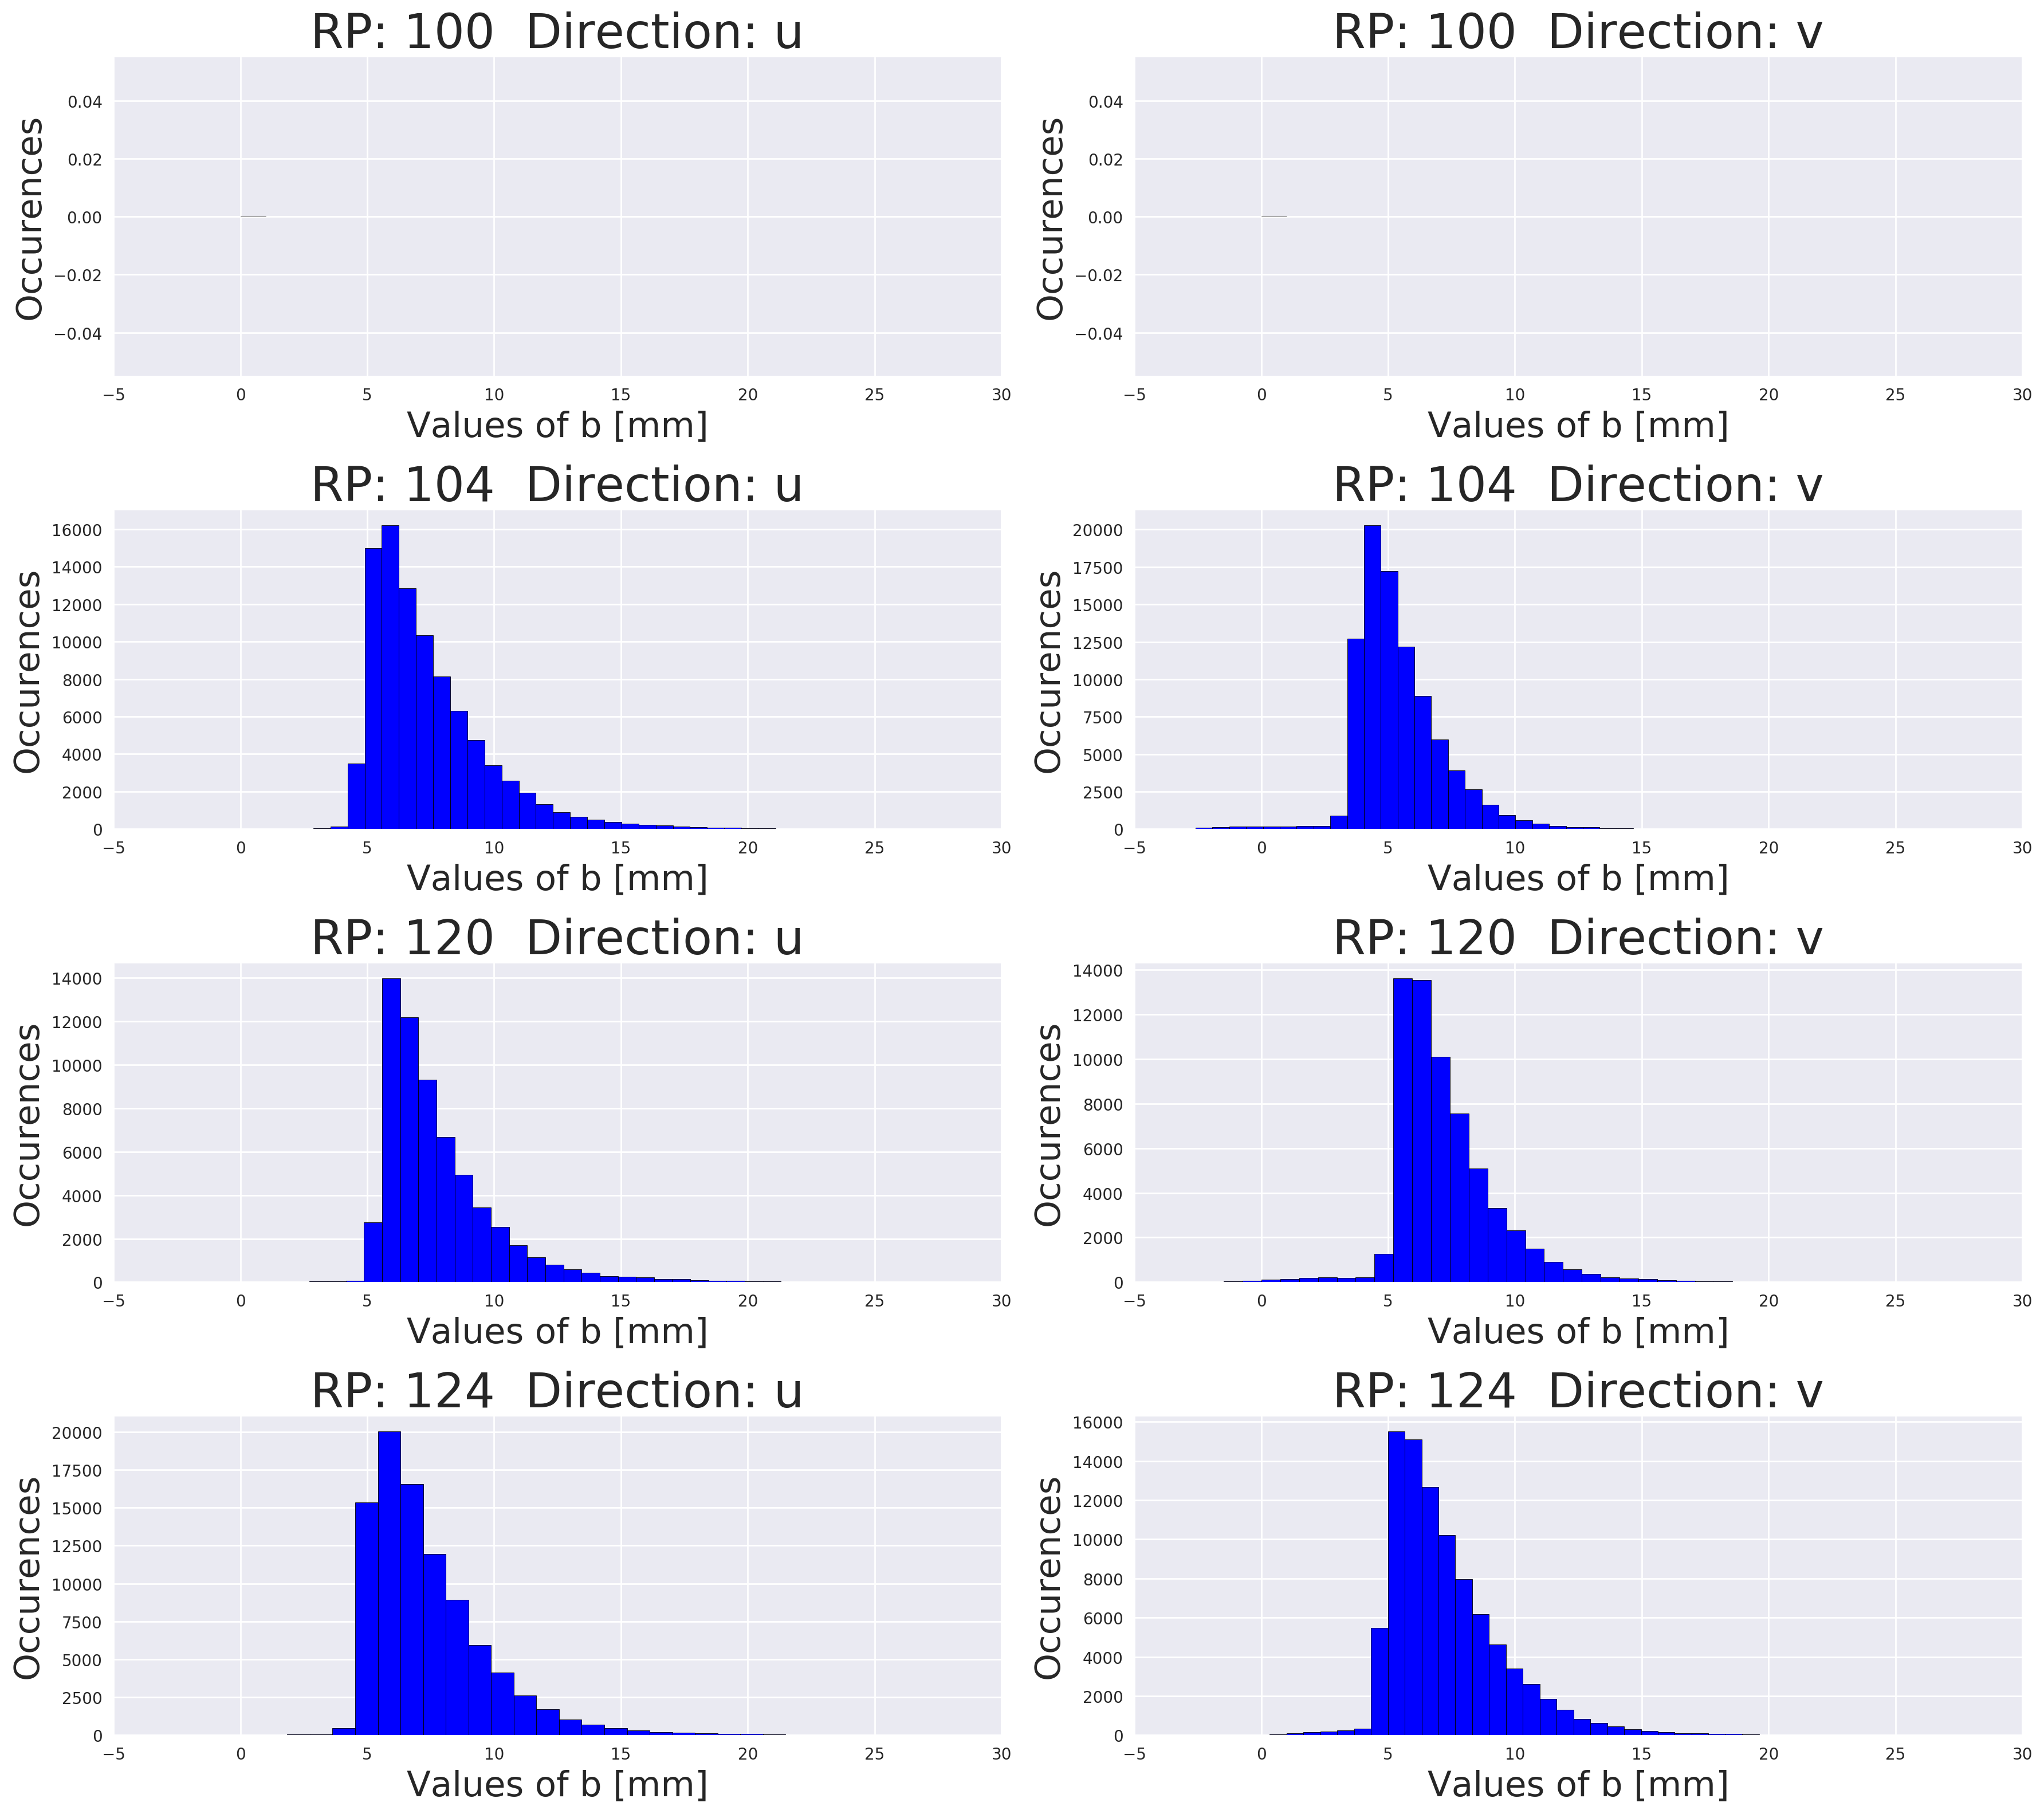

In [29]:
plots_for_group("R-TOP", B_LABEL, 50)

<h1>
    <font color=blue>A values <br> R-TOP group</font>
</h1>

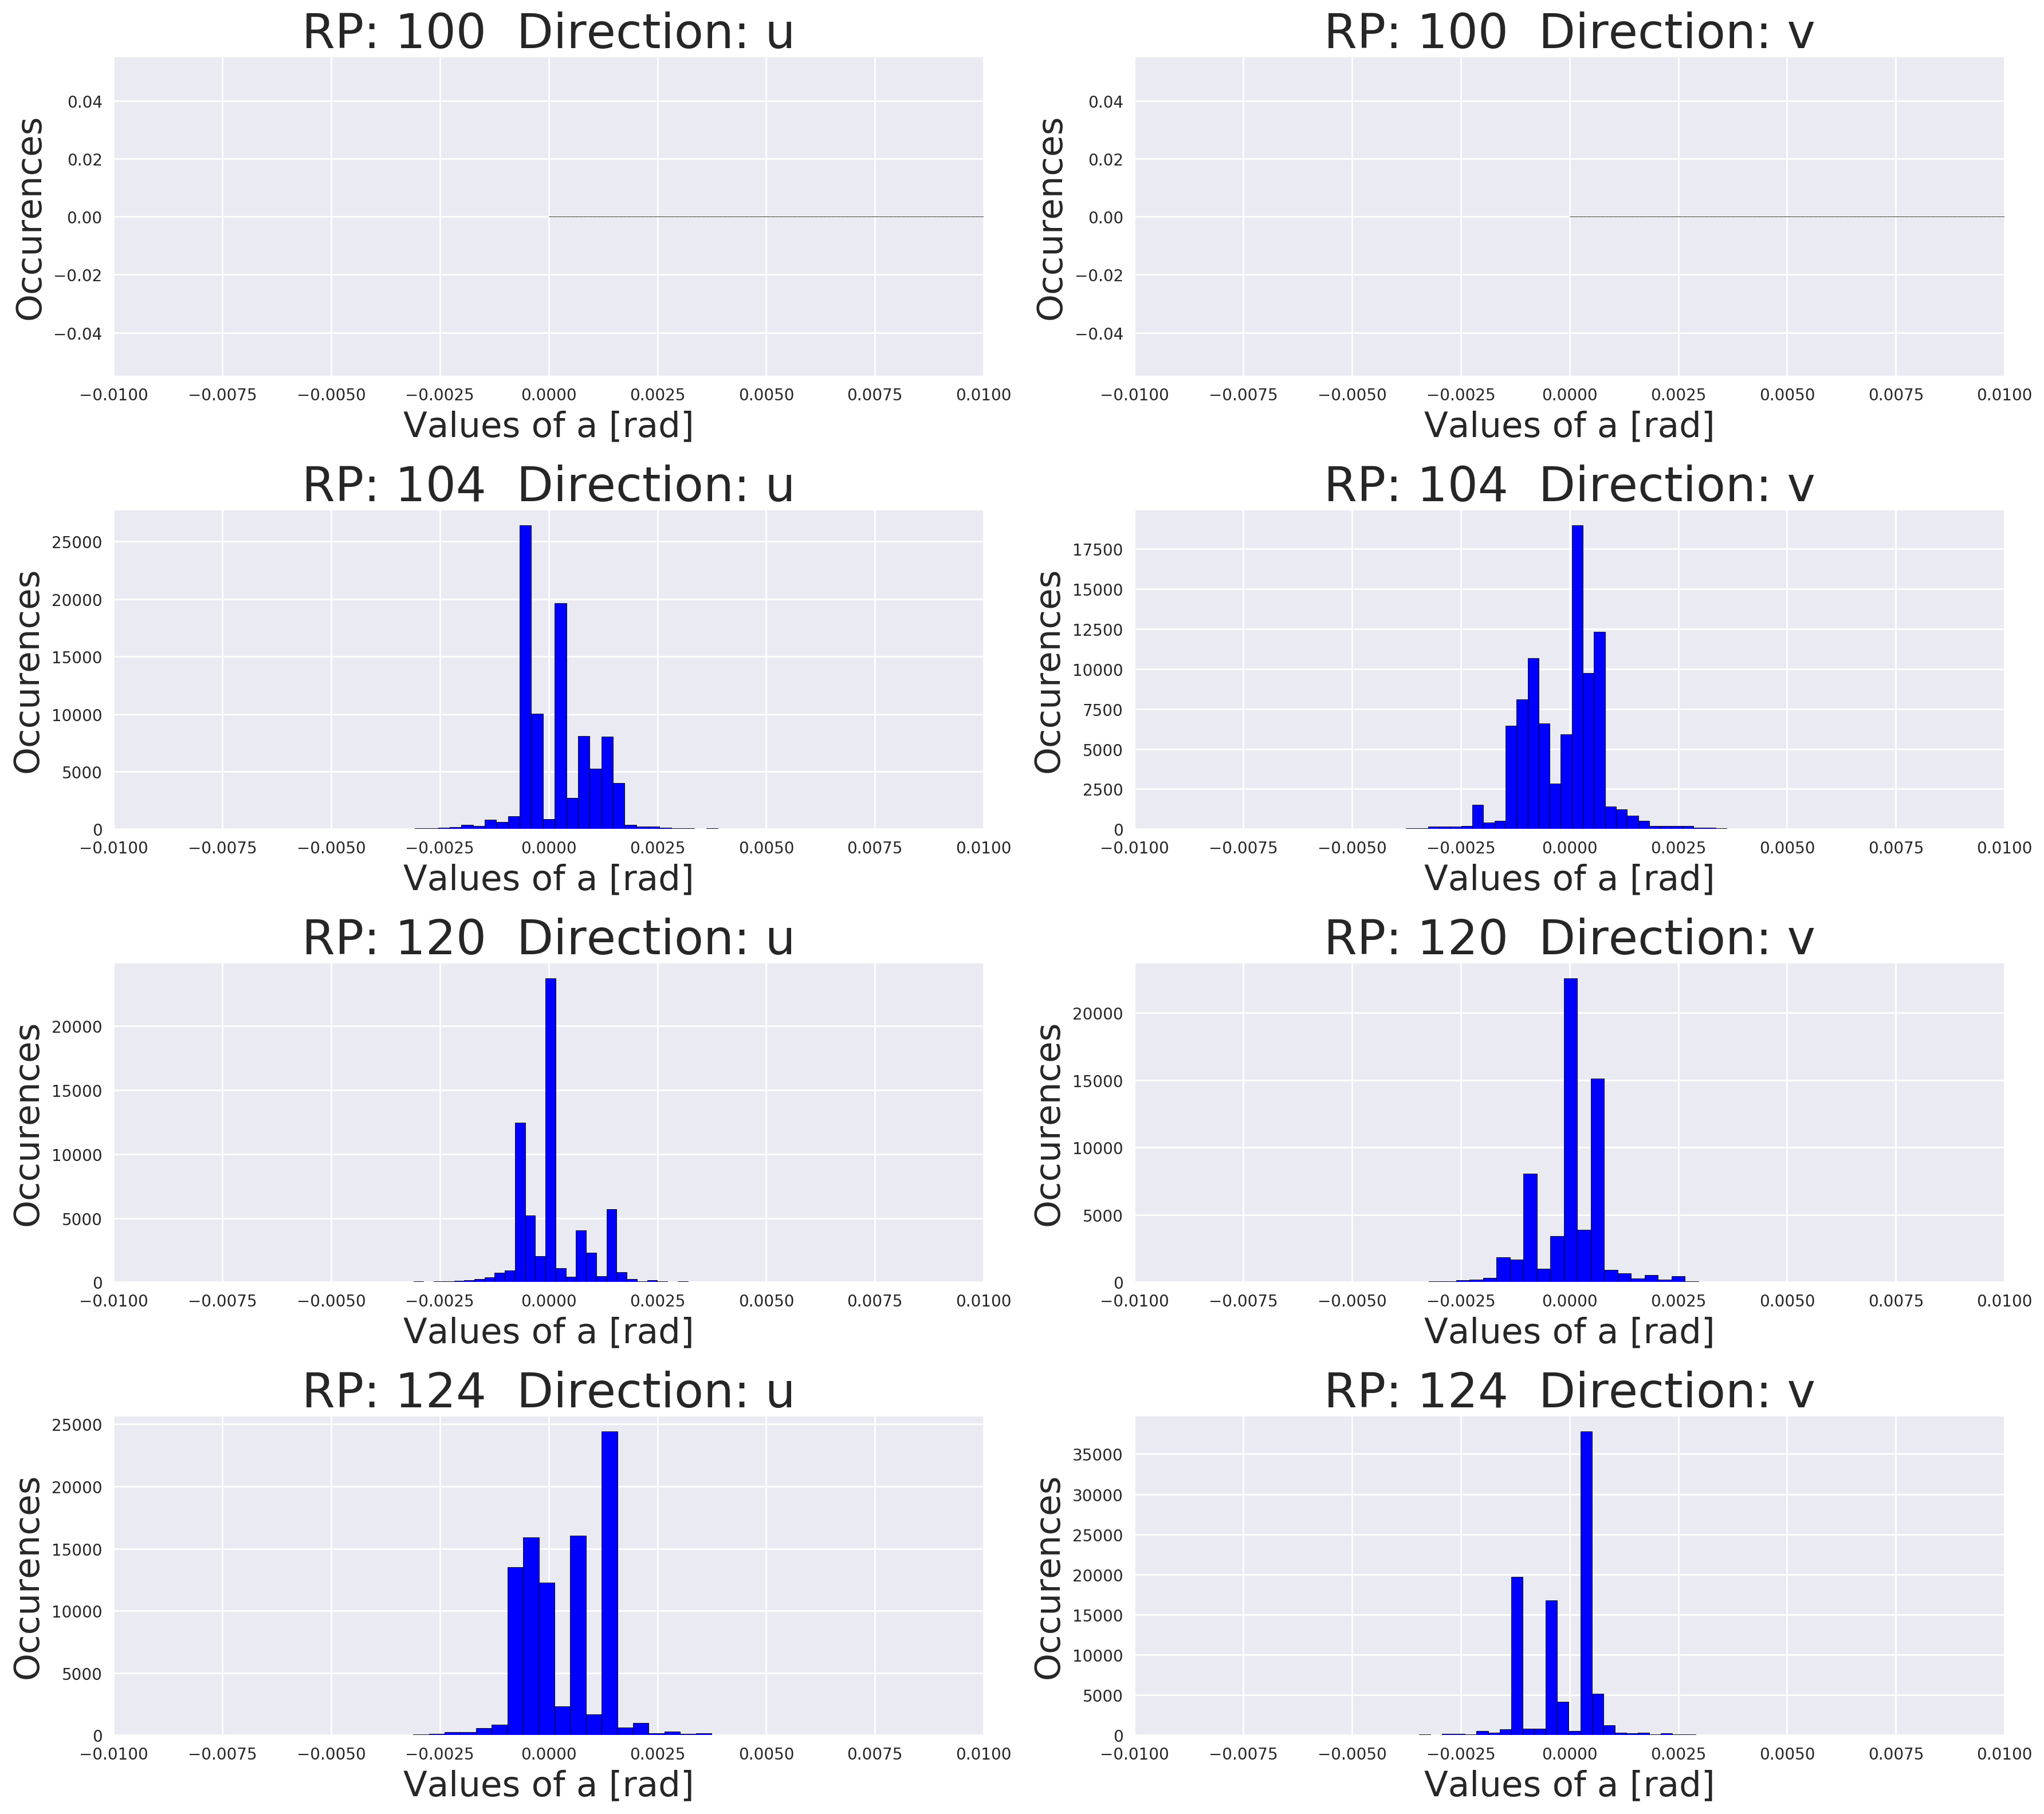

In [30]:
plots_for_group("R-TOP", A_LABEL, 10000)